<a href="https://colab.research.google.com/github/lcipolina/ML_Fundamentals/blob/main/Ex2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 2

Generate a data Frame with the given data


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from random import choices
import scipy.stats

In [2]:
# Data given
sample = [22.7,
       16.3,
       13.6,
       16.8,
       29.9,
       15.9,
       14,15,
       14.1,
       18.1,
       22.8,
       27.6,
       16.4,
       16.1,
       19,
       13.5,
       18.9,
       20.2,
       19.7,
       18.2,
       15.4,
       15.7,
       19,
       11.5,
       18.4,
       16,
       16.9,
       12,
       40.1,
       19.2]

# Create a DataFrame
data = {'data':pd.Series(sample)}
df = pd.DataFrame(data)
df.head()

,data
0,22.7
1,16.3
2,13.6
3,16.8
4,29.9


Calculate Mean and Variance

In [3]:
mean = df.mean(axis =0)
stdev = df.std(axis=0)
print('mean:', mean)
print('std_dev:',stdev)

mean: data    18.433333
dtype: float64
std_dev: data    5.765853
dtype: float64


Plot a histogram of the given sample

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8115ef4b50>]],
      dtype=object)

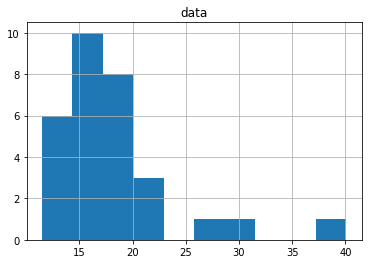

In [4]:
df.hist()

Compute the mean of the data and a 95% confidence interval, assuming normal distribution.

In [8]:
def mean_confidence_interval(data):
    confidence=0.95
    a = 1.0 * np.array(data)
    m = np.mean(a)
    se =  scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., len(a)-1)
    return m, m-h, m+h

In [9]:
print("Mean , upper bound and lower bound-Confidence Interval : ",mean_confidence_interval(sample))

Mean , upper bound and lower bound-Confidence Interval :  (18.433333333333334, 16.28032854784563, 20.586338118821036)


From the given observations, draw 1000 new samples, each of size 30. 

The samples are drawn uniformly, and with replacement. 

Compute the mean from each of the new samples.

 Call the mean x∗. Therefore, you have 1000 such means x∗1, x∗2 . . . x∗1000.

In [10]:
#Create new samples
sample_size= 30
N = 1000

draw_list = {}
for index in range(N):
  draw_list[index] = choices(sample, k=sample_size)

#Compute the mean from each sample
draw_list_mean = []
for key, value in draw_list.items():
  draw_list_mean.append(sum(value)/len(value))

#Print results
print("Means of 1000 draws :", draw_list_mean)


Means of 1000 draws : [17.813333333333333, 16.969999999999995, 21.19666666666667, 18.566666666666666, 17.983333333333334, 18.480000000000004, 18.560000000000002, 17.89333333333333, 19.18, 18.536666666666658, 17.36, 17.476666666666667, 17.303333333333335, 17.289999999999996, 18.220000000000002, 17.663333333333334, 19.62333333333333, 18.51, 19.2, 18.136666666666663, 18.05666666666667, 17.443333333333335, 18.81, 16.996666666666666, 17.296666666666667, 17.35, 18.436666666666664, 17.819999999999993, 17.496666666666666, 16.40333333333333, 18.086666666666662, 17.523333333333333, 19.139999999999997, 19.743333333333336, 17.176666666666662, 17.540000000000003, 17.76666666666667, 19.113333333333333, 19.006666666666668, 19.48333333333333, 18.926666666666673, 18.736666666666668, 20.65333333333333, 20.08, 19.20666666666667, 22.12333333333333, 17.586666666666662, 19.133333333333333, 16.96333333333333, 17.94666666666667, 18.94666666666666, 17.453333333333333, 20.693333333333335, 18.136666666666663, 18

Plot a histogram of the 1000 means computed in (c). What do you observe?

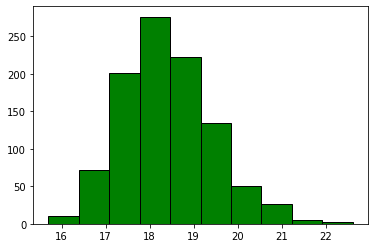

In [11]:
plt.hist(draw_list_mean, bins=10, color='green',ec='black')
plt.show()

Observation: 

* This new distribution is drawn from a continuous Normal distribution, therefore it presents values in all the domain. As opposed to the sample distribution which was a discrete distribution.

* The density plot is closer to that of the normal distribution, which is what the Central Limi theorem states (The central limit theorem (CLT) states that the distribution of sample means approximates a normal distribution as the sample size gets larger)

* As we are approximating a Normal distribution, these plot doesn't present the outliers to the right observed on the sample density plot.

Compute a 95% confidence interval from the bootstrap samples.


In [12]:
print("Mean , upper bound and lower bound-Confidence Interval : ",mean_confidence_interval(draw_list_mean))

Mean , upper bound and lower bound-Confidence Interval :  (18.406066666666664, 18.34296772892101, 18.469165604412318)


Observation:
* When we compare this confidence interval against the data's confidence interval, we see that this CI is much narrower. This means, the values of the upper bound and the lower boud of the interval are much closer. This is explained by the fact that the data has less variance, as a consequence of the lack of outliers.